In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import nbconvert

np.random.seed(10)

In [34]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


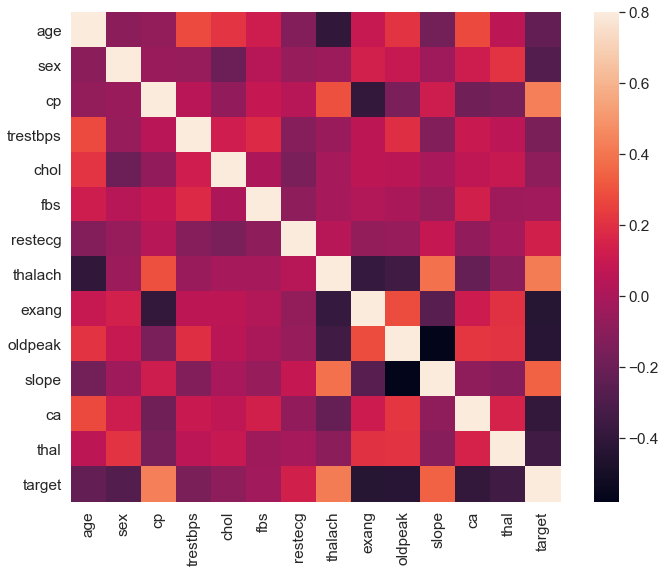

In [36]:
# correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square = True);

In [37]:
y = pd.DataFrame(df.target.value_counts())
y

,target
1,165
0,138


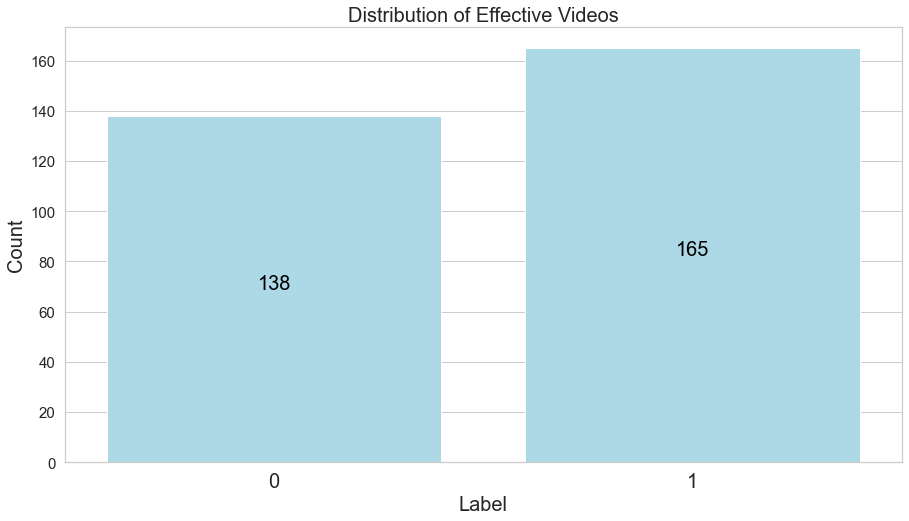

In [38]:
plt.rcParams['figure.figsize']=15,8
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(x=y.index, y=y['target'], color = '#ADD8E6', saturation =1.5)

plt.xlabel("Label", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Distribution of Effective Videos", fontsize = 20)
plt.xticks(fontsize = 20, horizontalalignment = 'center')
plt.yticks(fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(height), (x + width/2, y + height*0.5), ha='center', fontsize = '20', color = 'black')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
x=df.drop('target',axis=1)
y=df.target

print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [42]:
##### from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=40,sampling_strategy=1)

x_sm, y_sm = sm.fit_resample(x,y)

print(f''' X's Shape before SMOTE :{x.shape}
X's Shape After SMOTE : {x_sm.shape}''')

print(f''' Y's Shape before SMOTE :{y.shape}
Y's Shape After SMOTE : {y_sm.shape}''')


 X's Shape before SMOTE :(303, 13)
X's Shape After SMOTE : (330, 13)
 Y's Shape before SMOTE :(303,)
Y's Shape After SMOTE : (330,)


In [43]:
x = x_sm
y = y_sm

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [44]:
#Check the class imbalance now
print('The percentage split of each target class')
y.value_counts(normalize=True)*100

The percentage split of each target class


1    50.0
0    50.0
Name: target, dtype: float64

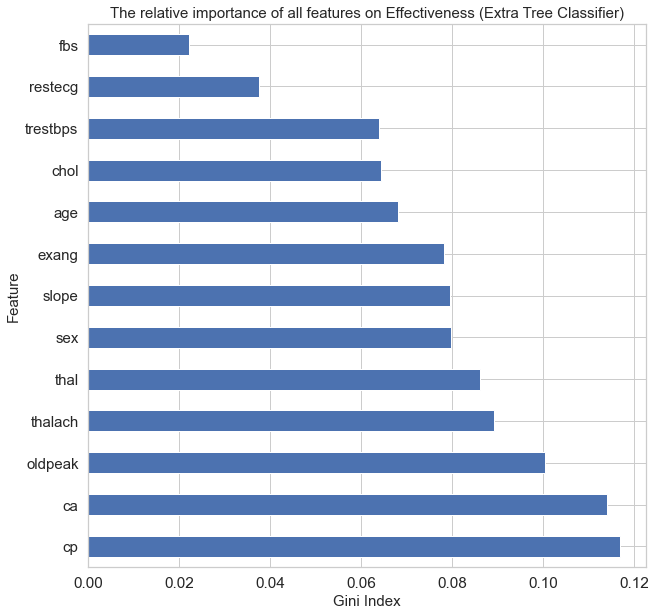

In [45]:
sns.set_style("whitegrid")

plt.rcParams['figure.figsize']=10,10 

from sklearn.ensemble import ExtraTreesClassifier

#model = ExtraTreesClassifier(criterion = 'entropy')
model = ExtraTreesClassifier(criterion = 'gini')

model.fit(x_train,y_train)
#print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.yticks(fontsize = 15, rotation = 0)

plt.title('The relative importance of all features on Effectiveness (Extra Tree Classifier)',fontsize = 15)
plt.xlabel('Gini Index',fontsize = 15)
plt.ylabel('Feature', fontsize = 15)

#plt.axvline(x=0.02, color = 'red')

plt.show()

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [ ]:
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,50,100,500],
            'criterion' :['gini', 'entropy'],
            'min_samples_leaf' : [2,3,4]
        }
    },
    'Decision Tree': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' :['gini', 'entropy'],
            'max_depth' : [2,3,4],
            'min_samples_leaf' : [2,3,4]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [100,10,1,0.1,0.01],
            'solver':['newton_cg','liblinear','lbfgs','sag','saga'],
            'penalty':['l1','l2','none']
        }
    },
    'XGBoost': {
        'model' : XGBClassifier(),
        'params' : {
            'n_estimators':[5,10,50,100,200],
            'max_depth' : [2,3,4],
            'colsample_bytree' : [0.2,0.4,0.6],
            'gamma' : [0.5,1,2,4],
            'min_child_weight' : [2,3,4]
            
        }
    },
    
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name7,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

In [ ]:
results

### Logistic Regression

In [57]:
model = LogisticRegression(C = 10, solver='liblinear', penalty = 'l1')

#Fitting the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

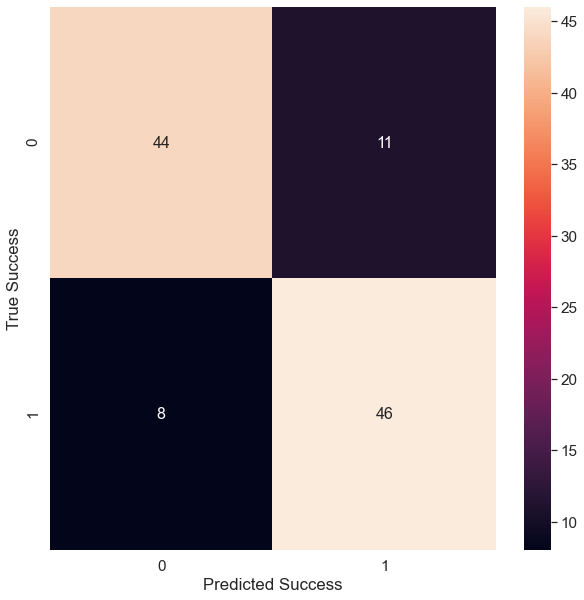

The Logistic Regression model accuracy is:  82.57 %


In [58]:
log_list = []

acc_logreg = accuracy_score(y_test, y_pred)
log_list.append(acc_logreg)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.ylabel('True Success')
plt.xlabel('Predicted Success')

plt.show()
print('The Logistic Regression model accuracy is: ', f'{acc_logreg*100:.4}','%')

### Decision Tree Classifier

In [70]:
#Here we choose the lowest number of leaf nodes with the highest accuracy in order to try to avoid overfitting, by giving the model less freedom
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1]


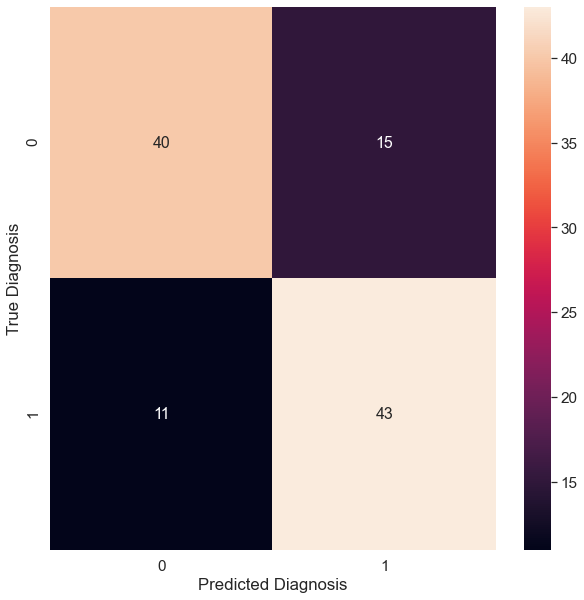

The Decision Tree Classifier model accuracy is:  76.15 %


In [74]:
#Visualising the results

list3 = []

acc_tree = accuracy_score(y_test, y_pred)
list3.append(acc_tree)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')

plt.ylabel('True Diagnosis')
plt.xlabel('Predicted Diagnosis')

plt.show()

print('The Decision Tree Classifier model accuracy is: ', f'{acc_tree*100:.4}','%')

### Random Forest Classifier

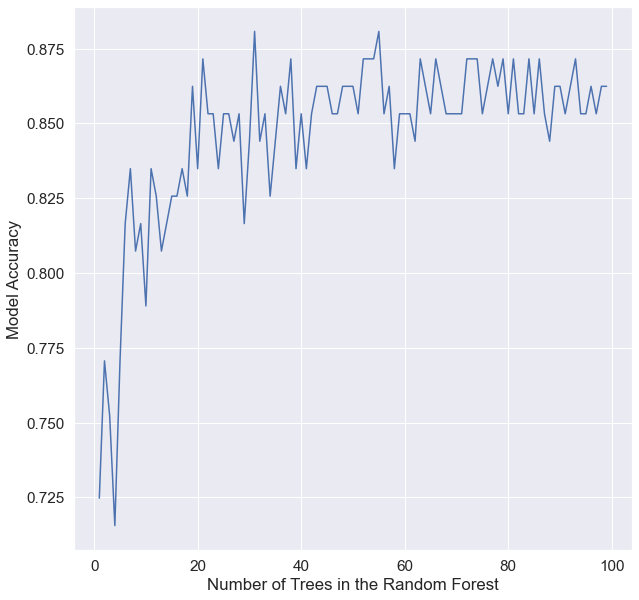

31


In [61]:
list1 = []
for estimators in range(1,100):
    classifier = RandomForestClassifier(criterion = 'gini',n_estimators=estimators,min_samples_leaf=4)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(1,100)), list1)

plt.ylabel('Model Accuracy')
plt.xlabel('Number of Trees in the Random Forest')

plt.show()

print(str(list1.index(max(list1)) + 1))

In [75]:
classifier = RandomForestClassifier(n_estimators = list1.index(max(list1)) + 1, criterion='gini', min_samples_leaf=4)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

ValueError: max() arg is an empty sequence

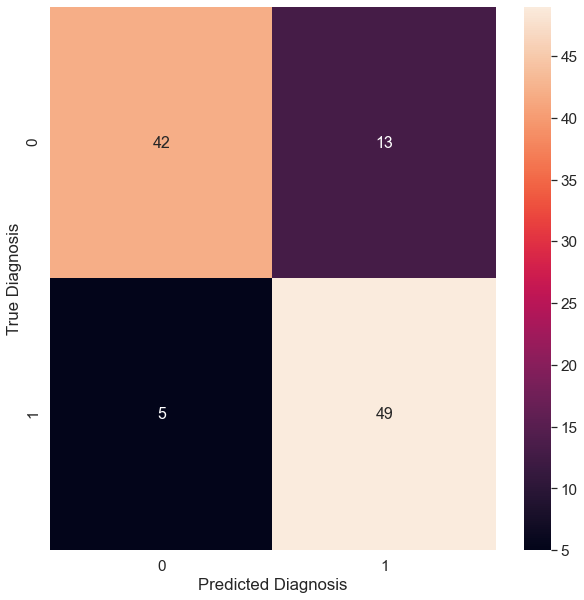

The Decision Tree Classifier model accuracy is:  83.49 %


In [65]:
#Visualising the results

list5 = []

acc_random = accuracy_score(y_test, y_pred)
list5.append(acc_random)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt = 'g')

plt.ylabel('True Diagnosis')
plt.xlabel('Predicted Diagnosis')

plt.show()

print('The Decision Tree Classifier model accuracy is: ', f'{acc_random*100:.4}','%')

In [63]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

tn = cm.loc[0,0]
tp = cm.loc[1,1]
fn = cm.loc[1,0]
fp = cm.loc[0,1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", f'{precision*100:.4}','%')
print("Recall: ", f'{recall*100:.4}','%')
print("F1-Score: ", f'{f1*100:.4}','%')

Precision:  79.03 %
Recall:  90.74 %
F1-Score:  84.48 %


### XGBoost Classifier

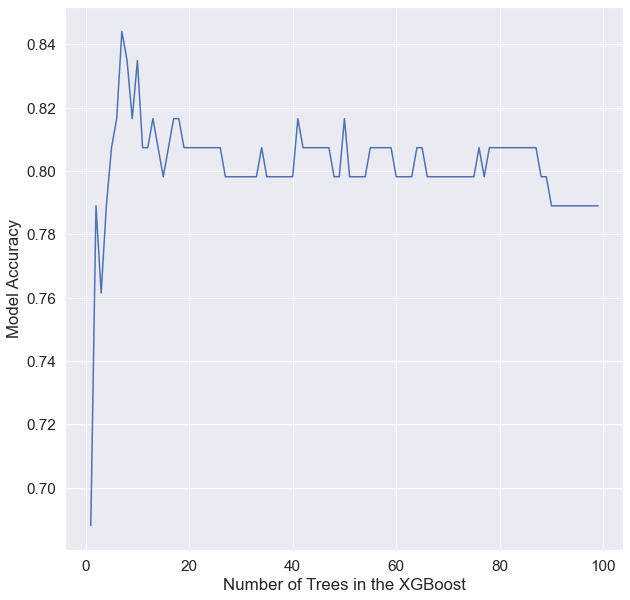

16


In [68]:
list1 = []
for estimators in range(1,100,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))

plt.ylabel('Model Accuracy')
plt.xlabel('Number of Trees in the XGBoost')    
    
plt.plot(list(range(1,100,1)), list1)
plt.show()

print(str(list1.index(max(list1)) + 10))

In [69]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

tn = cm.loc[0,0]
tp = cm.loc[1,1]
fn = cm.loc[1,0]
fp = cm.loc[0,1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", f'{precision*100:.4}','%')
print("Recall: ", f'{recall*100:.4}','%')
print("F1-Score: ", f'{f1*100:.4}','%')

Precision:  75.41 %
Recall:  85.19 %
F1-Score:  80.0 %
